# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = "2b5d420394a2cb8a1fed6e5574203e5f"
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [10]:
# URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
response = requests.get(f"{url}&q={city}").json() 
response

{'coord': {'lon': 19.24, 'lat': -34.42},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 64,
  'pressure': 1004,
  'humidity': 87,
  'temp_min': 64,
  'temp_max': 64},
 'wind': {'speed': 8.01, 'deg': 114, 'gust': 20},
 'clouds': {'all': 100},
 'dt': 1575255236,
 'sys': {'type': 3,
  'id': 2006131,
  'country': 'ZA',
  'sunrise': 1575257040,
  'sunset': 1575308458},
 'timezone': 7200,
 'id': 3366880,
 'name': 'Hermanus',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Hold info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        record= record + 1
        time.sleep(1.00)
        
    # If no record found "skip" to next call
    except:
        print(f"{city_record} not found. Skipping...")
    continue

print ("Process Completed")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Cape Town
Processing Record 2 | Bay Roberts
Processing Record 3 | Dickinson
Processing Record 4 | Atuona
Processing Record 5 | Padang
Padang not found. Skipping...
Processing Record 6 | Butterworth
Processing Record 7 | Mataura
Processing Record 8 | Busselton
Processing Record 9 | Menongue
Processing Record 10 | Betare Oya
Processing Record 11 | Saldanha
Processing Record 12 | Tuktoyaktuk
Processing Record 13 | Gloucester
Processing Record 14 | Kintinku
Processing Record 15 | Upernavik
Upernavik not found. Skipping...
Processing Record 16 | Ushuaia
Processing Record 17 | New Norfolk
Processing Record 18 | Valdivia
Processing Record 19 | Butaritari
Processing Record 20 | Arraial do Cabo
Processing Record 21 | Mahibadhoo
Processing Record 22 | Brae
Processing Record 23 | Lebu
Lebu not found. Skipping...
Processing Record 24 | Tasiilaq
Processing Record 25 | Lichinga
Processing Record 26 | East London
East London

Processing Record 226 | Samarai
Processing Record 227 | Leh
Processing Record 228 | Zheleznogorsk
Processing Record 229 | Faya
Processing Record 230 | Kuala Lipis
Processing Record 231 | La Asuncion
Processing Record 232 | Husavik
Processing Record 233 | Santiago de Cao
Processing Record 234 | Yulara
Processing Record 235 | Hambantota
Hambantota not found. Skipping...
Processing Record 236 | Yantal
Processing Record 237 | Miri
Processing Record 238 | Portland
Portland not found. Skipping...
Processing Record 239 | Ugoofaaru
Ugoofaaru not found. Skipping...
Processing Record 240 | Cayenne
Processing Record 241 | Rio Tinto
Processing Record 242 | Hirara
Processing Record 243 | Zwedru
Processing Record 244 | Sechura
Processing Record 245 | Shihezi
Shihezi not found. Skipping...
Shihezi not found. Skipping...
Processing Record 246 | Kenitra
Processing Record 247 | Castro
Processing Record 248 | Diego de Almagro
Processing Record 249 | Razole
Processing Record 250 | Morant Bay
Processing Re

Processing Record 439 | Alice Springs
Processing Record 440 | Nata
Processing Record 441 | Atasu
Processing Record 442 | Ilhabela
Processing Record 443 | Ozinki
Processing Record 444 | Northam
Processing Record 445 | Benghazi
Processing Record 446 | Luderitz
Processing Record 447 | Maputo
Processing Record 448 | Galesong
Processing Record 449 | Marsh Harbour
Processing Record 450 | Bandarbeyla
Processing Record 451 | Mindif
Processing Record 452 | Tongchuan
Processing Record 453 | Banda Aceh
Processing Record 454 | Shenzhen
Processing Record 455 | Male
Processing Record 456 | Gazli
Processing Record 457 | Suntar
Processing Record 458 | Providencia
Processing Record 459 | Dryden
Processing Record 460 | Tiznit
Processing Record 461 | Khash
Processing Record 462 | Dawson Creek
Processing Record 463 | Dali
Processing Record 464 | Harper
Processing Record 465 | Puerto Rondon
Processing Record 466 | Tura
Processing Record 467 | Saint-Francois
Processing Record 468 | Kungurtug
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Collect Retrieved Information
weatherpy_info = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Convert to PD.DataFrame
weather_data = pd.DataFrame(weatherpy_info)

# Display count of weather data values 
weather_data.count()

# Save data frame to CSV
weather_data.to_csv('openweathermap_data.csv')

In [15]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,100,ZA,1575255084,77,-33.93,18.42,64.00,8.05
1,Bay Roberts,90,CA,1575255240,79,47.58,-53.28,30.99,9.17
2,Dickinson,1,US,1575255091,78,46.88,-102.79,19.99,13.87
3,Atuona,27,PF,1575254654,64,-9.80,-139.03,80.35,7.23
4,Padang,64,ID,1575255244,85,-0.92,100.36,77.11,3.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

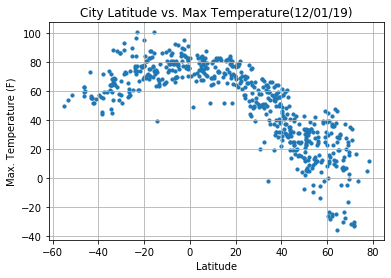

In [16]:
# Display scatter graph
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature(12/01/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemperaturePlot.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

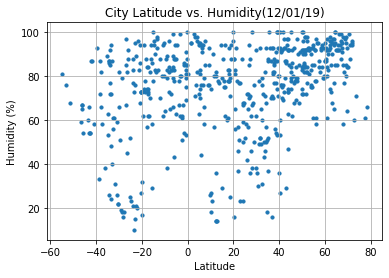

In [17]:
# Display scatter graph
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity(12/01/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidityPlot.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

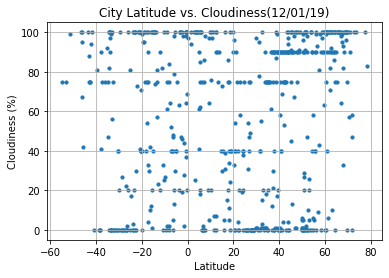

In [18]:
# Display scatter graph
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness(12/01/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudiness.png")
# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

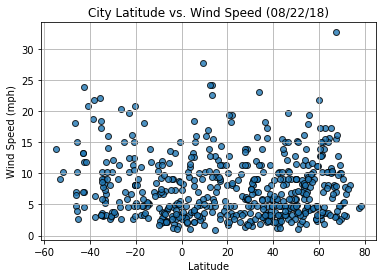

In [9]:
# Display scatter graph
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed(12/01/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()